# DS 325 - Week 01 - hw

In this notebook, we will perform some basic data analysis.  Your homework assignment will be to perform the same steps with different datasets adding your work into this Jupyter notebook in the designated areas and answering questions about your work in a corresponding Moodle quiz.  

Note: you can view the [Markdown format](https://daringfireball.net/projects/markdown/syntax) sections are written.  For your reference, there is a nice [Markdown Cheatsheet by Adam Pritchard](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet).  For any of these text sections, double-click on them and Edit to see the underlying syntax (i.e. structure, form) that generates the formatting you see.  Then press Control-Enter (Command-Enter) to interpret the syntax and see how the Markdown displays.



First, we import necessary libraries into our Python environment.  You will not need to re-import these for your exercises below (its already loaded into the kernel).  
* **numpy** is a scientific computing library which includes fast, efficient, multidimensional arrays (i.e. tables) for our data
* **pandas** builds on numpy to give us efficient data structures (e.g. dataframes) and data analysis tools which are fundamental to data science <!-- * **pandas_profiling** adds tools for analyzing and helping us better understand our data.-->
* **matplotlib** is a 2D plotting library for scientific visualization
* **statsmodel** provides a variety of regression, classification, and machine learning algorithms for building models of our data, many alternative **sklearn**, **scipy**, ...

These imports need only occur once before their use, and should not be copied and repeated below.  To start the notebook fresh and rerun the cells of your notebook, "Restart and run all..." (using the button or Kernel menu item).

# Data: iris

The iris dataset contains the following data
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)

<div>
<img src='http://public.gettysburg.edu/~jpuckett/ds325/class01-intro/iris.png' width="400">
</div>



In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
sns.axes_style("whitegrid")
sns.set_context("paper")
import statsmodels.api as sm

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Our first step is to read data from a [comma-separated values (CSV) file](https://en.wikipedia.org/wiki/Comma-separated_values) named "`data.csv`".  We will load the CSV data into a `pandas` dataframe "`df`" like this:

For each exercise, I will provide two methods to import the data.  One uses a url (download the data and store in RAM), or you may download the dataset and import from the working directory.  I'll usually do the later as I can work on a project offline.  Please uncomment the method you want to use and comment the other.

In [43]:
# Load Iris Data
#web_path = 'data/' #if downloaded data to the current folder
web_path = 'http://public.gettysburg.edu/~jpuckett/ds325/data/' #if using data over web
df = pd.read_csv(web_path+'iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


.describe() generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [44]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


.info() prints a concise summary of a DataFrame

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


plot correlations and distribution for our dataset

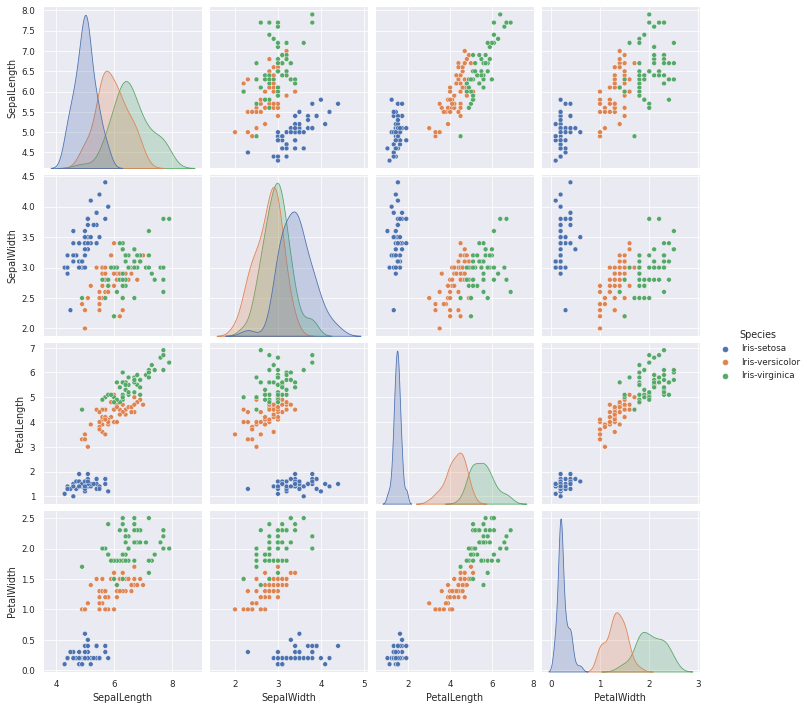

In [46]:
sns.pairplot(df, hue= 'Species');

Onto some simple analysis

Text(4, 2, 'virginica')

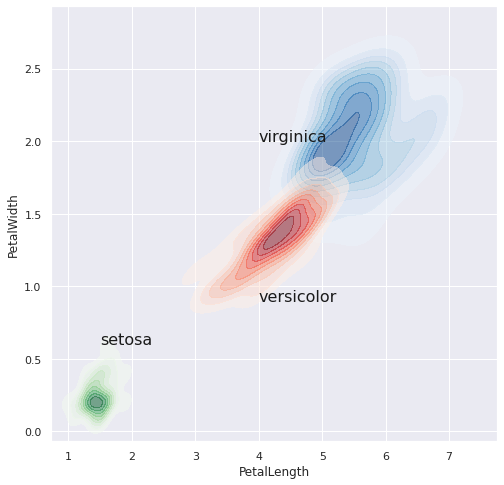

In [47]:
# kdeplot using seaborn
sns.set(style='darkgrid')
setosa = df.query("Species=='Iris-setosa'")
versicolor = df.query("Species=='Iris-versicolor'")
virginica = df.query("Species=='Iris-virginica'")

f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(x=setosa.PetalLength, y=setosa.PetalWidth, cmap="Greens", shade=True, thresh=0.05,alpha=0.5)
ax = sns.kdeplot(x=virginica.PetalLength, y=virginica.PetalWidth, cmap="Blues", shade=True, thresh=0.05,alpha=0.5)
ax = sns.kdeplot(x=versicolor.PetalLength, y=versicolor.PetalWidth, cmap="Reds", shade=True, thresh=0.05,alpha=0.5)
#
ax.text(1.5, 0.6, "setosa", size=16, color='k')
ax.text(4, 0.9, "versicolor", size=16, color='k')
ax.text(4, 2, "virginica", size=16, color='k')

# Data: Advertising

The advertising dataset contains the following data
* 200 samples of the budget for advertising for **TV**,	**Radio**,	and **Newspaper**
* Dependent variable is **Sales**
* Sales are in thousands of units and the budget is in thousands of dollars.


Our first step is to read data from a [comma-separated values (CSV) file](https://en.wikipedia.org/wiki/Comma-separated_values) named "`data.csv`".  We will load the CSV data into a `pandas` dataframe "`df`" like this:

For each exercise, I will provide two methods to import the data.  One uses a url (download the data and store in RAM), or you may download the dataset and import from the working directory.  I'll usually do the later as I can work on a project offline.  Please uncomment the method you want to use and comment the other.

In [48]:
# Load Advertising dataset
web_path = 'http://public.gettysburg.edu/~jpuckett/ds325/data/' #if using data over web
df = pd.read_csv(web_path+'advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


.describe() generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [49]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


.info() prints a concise summary of a DataFrame

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


plot correlations and distribution for our dataset

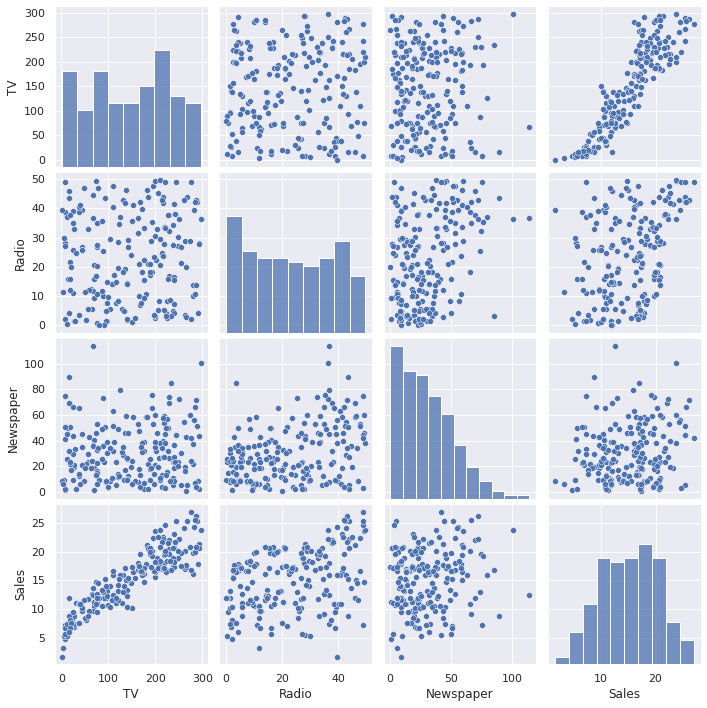

In [51]:
sns.pairplot(df);

Lets quantify the correlations between variables.

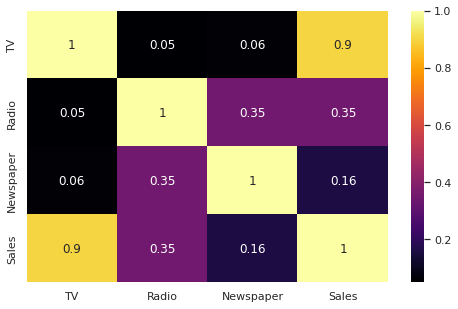

In [52]:
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(8.1, 5))
sns.heatmap(data=correlation_matrix, annot=True, cmap='inferno')# annot = True to print the values inside the square

We see that TV and Sales have the highest correlation.  However we also see that Radio and Newspaper have a correlations of 0.35 -- we'll come back to that on your Exercise.

Onto some simple analysis

## Exercises

For these exercises, use this Jupyter Notebook to show your work after each corresponding code block comment below. You may add blocks if necessary.

### Exercise 1

In the Exercise 1 space below, use the **iris** data set to

* make a labeled density plot (kdeplot) of the SepalLength (y) vs. SepalWidth (x)

In [53]:
# insert code here
web_path = 'http://public.gettysburg.edu/~jpuckett/ds325/data/iris.csv'
iris_df = pd.read_csv(web_path)
iris_df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


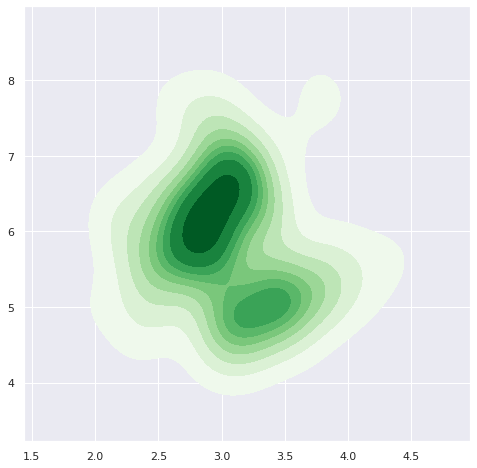

In [54]:
# kdeplot using seaborn
sns.set(style='darkgrid')
x_sepalWidth = np.array(iris_df['SepalWidth'])
y_sepalLenght = np.array(iris_df['SepalLength'])
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(x=x_sepalWidth, y=y_sepalLenght, cmap="Greens", shade=True)#, thresh=0.05,alpha=0.5)

Text(3, 7.5, 'virginica')

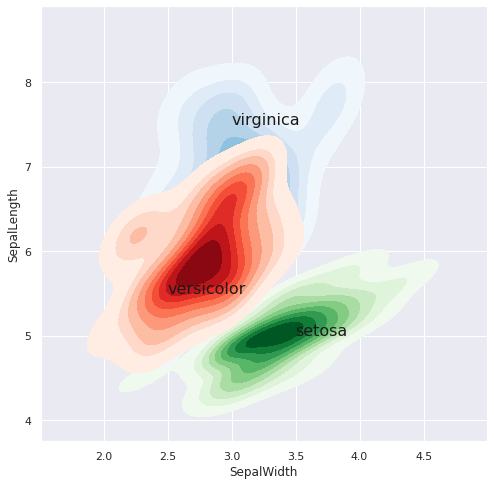

In [55]:
# kdeplot using seaborn
sns.set(style='darkgrid')
setosa = iris_df.query("Species=='Iris-setosa'")
versicolor = iris_df.query("Species=='Iris-versicolor'")
virginica = iris_df.query("Species=='Iris-virginica'")

f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(x=setosa.SepalWidth, y=setosa.SepalLength, cmap="Greens", shade=True)#, thresh=0.05,alpha=0.5)
ax = sns.kdeplot(x=virginica.SepalWidth, y=virginica.SepalLength, cmap="Blues", shade=True)#, thresh=0.05,alpha=0.5)
ax = sns.kdeplot(x=versicolor.SepalWidth, y=versicolor.SepalLength, cmap="Reds", shade=True)#, thresh=0.05,alpha=0.5)

ax.text(3.5, 5, "setosa", size=16, color='k')
ax.text(2.5, 5.5, "versicolor", size=16, color='k')
ax.text(3, 7.5, "virginica", size=16, color='k')

The below exercises use the **advertising** dataset.

### Exercise 2

In the space below, use the advertising data set to explore how **Sales** (y) depends on **Newspaper** (x1).
* practice the same techniques above to **load the data**
* **display** samples and statistics of the data, 
* perform a **linear regression** of y on x values, **plot**
* print the coefficients and 
* $R^2$ score.
* Use statistics from the regression, and explain the relationship.

In [56]:
# load data into a dataframe and describe it
web_path = 'http://public.gettysburg.edu/~jpuckett/ds325/data/advertising.csv'
advertising_df = pd.read_csv(web_path)
display(advertising_df.head())
advertising_df.describe()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [57]:
# perform linear regression
x_newspaper = np.array(advertising_df['Newspaper'])
y = np.array(advertising_df['Sales'])

weights = np.polyfit(x_newspaper, y, 1)
model = np.poly1d(weights)
print(model)

 
0.03832 x + 13.96


In [58]:
# print the x coefficients, the y-intercept, the R^2 score, and the p-value
lm = sm.OLS.from_formula('Sales ~ Newspaper', data=advertising_df) #y~x
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Tue, 25 Jan 2022   Prob (F-statistic):             0.0255
Time:                        03:56:26   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9595      0.638     21.870      0.0

In [59]:
print(f'slope: {result.params[1] : .5f}')
print(f'y-intercept: {result.params[0] : .5f}')
print(f'R^2: {result.rsquared}')
print(f'p-value: {result.pvalues}')

slope:  0.03832
y-intercept:  13.95955
R^2: 0.024951369862865058
p-value: Intercept    1.030043e-54
Newspaper    2.548744e-02
dtype: float64


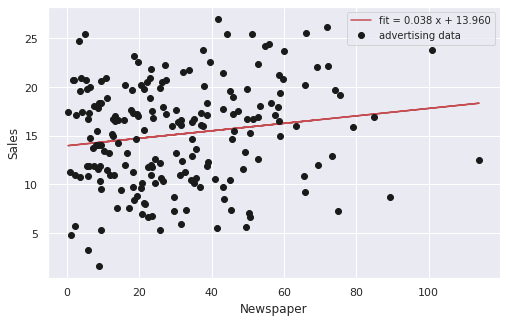

In [60]:
# plot Sales as a function of newspapers. include the fit

slope = result.params[1] # or model.coefficients[0]
intercept = result.params[0] # or model.coefficients[1]
y_pred = slope*x_newspaper + intercept

# Plot regression against actual data
plt.figure(figsize=(8.1, 5))
lbl="fit = %3.3f x + %3.3f"%(slope,intercept)

# regression line
plt.plot(x_newspaper, y_pred,'r-',label=lbl)

# scatter plot showing actual data
plt.plot(x_newspaper, y, 'ko',label='advertising data')

plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend(fontsize=10)
plt.show()

#### Interpret the regression results
- Based on linear regression result, we note that the p-value of the coef of newspaper advertisement is 0.025, which is less than 0.05. This means that we reject the null hypothesis. This indicates that the coef of newspaper advertisement is statistically significant at 95% confident level. Each addtional unit of newspaper ad is associate with an increase of 0.0383 unit of Sales.
- We note that R^2=0.02495 which means 2.495% variation in the predicted Sales can be explained by newspaper advertisement.

### Exercise 3

In the space below, use the advertising data set to explore how **Sales** (y) depends on only **Radio** (x1) advertising.
* practice the same techniques above to **load the data**
* **display** samples and statistics of the data, 
* perform a **linear regression** of y on x values, **plot**
* print the coefficients and 
* $R^2$ score, and make the requested prediction.
* Use statistics from the regression, and explain the relationship.

In [61]:
# load data into a dataframe and describe it
web_path = 'http://public.gettysburg.edu/~jpuckett/ds325/data/advertising.csv'
advertising_df = pd.read_csv(web_path)
display(advertising_df.head())
advertising_df.describe()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [62]:
# perform linear regression
x_radio = np.array(advertising_df['Radio'])
y = np.array(advertising_df['Sales'])

weights = np.polyfit(x_radio, y, 1)
model = np.poly1d(weights)
print(model)

 
0.1244 x + 12.24


In [63]:
# print the x coefficients, the y-intercept, the R^2 score, and the p-value
lm = sm.OLS.from_formula('Sales ~ Radio', data=advertising_df) #y~x
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           3.88e-07
Time:                        03:56:27   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2357      0.653     18.724      0.0

In [64]:
print(f'slope: {result.params[1] : .5f}')
print(f'y-intercept: {result.params[0] : .5f}')
print(f'R^2: {result.rsquared}')
print(f'p-value: {result.pvalues}')

slope:  0.12443
y-intercept:  12.23572
R^2: 0.12224190399478596
p-value: Intercept    1.081986e-45
Radio        3.882892e-07
dtype: float64


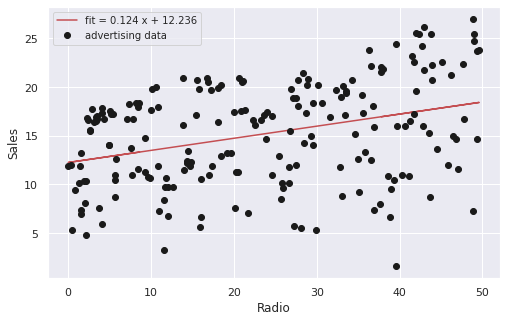

In [65]:
# plot Sales as a function of newspapers. include the fit

slope = result.params[1]
intercept = result.params[0]
y_pred = slope*x_radio + intercept

# Plot regression against actual data
plt.figure(figsize=(8.1, 5))
lbl="fit = %3.3f x + %3.3f"%(slope,intercept)

# regression line
plt.plot(x_radio, y_pred,'r-',label=lbl)

# scatter plot showing actual data
plt.plot(x_radio, y, 'ko',label='advertising data')

plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend(fontsize=10)
plt.show()

#### Interpret the regression results
- Based on linear regression result, we note that the p-value of the coef of radio advertisement is 1.081986e-45, which is less than 0.05. This means that we reject the null hypothesis. This indicates that the coef of radio advertisement is statistically significant. Each addtional unit of radio advertisement is associate with an increase of 0.12443 unit of Sales.
- We note that R^2=0.1222 which means 12.22% variation in the predicted Sales can be explained by radio advertisement.

### Exercise 4

In the space below, use the advertising data set to explore how **Sales** (y) depends on **Radio** (x2) and **Newspaper** (x3) advertising.
* practice the same techniques above to **load the data**
* **display** samples and statistics of the data, 
* perform a **linear regression** of y on x values, **no need to plot here**
* print the coefficients and 
* $R^2$ score.
* Use statistics from the regression, and explain the relationship.


a) Putting all this analysis together (class+exercises), what can you say about the relationship between **Sales** (y) and **Newspaper** (x).  
b) Why did the univariate regression give a small p-value but the multivariate (with all three) gave a large p-value for **Newspaper** (x3)?  Hint: Go Review our work from class.


In [66]:
# load data into a dataframe and describe it
web_path = 'http://public.gettysburg.edu/~jpuckett/ds325/data/advertising.csv'
advertising_df = pd.read_csv(web_path)
display(advertising_df.head())
advertising_df.describe()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [67]:
# perform linear regression
lm = sm.OLS.from_formula('Sales ~ Radio+Newspaper', data = df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.89
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           2.28e-06
Time:                        03:56:27   Log-Likelihood:                -603.03
No. Observations:                 200   AIC:                             1212.
Df Residuals:                     197   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0607      0.728     16.556      0.0

In [68]:
# print the x coefficients, the y-intercept, the R^2 score, and the p-value
print(f'slope of radio: {result.params[1] : .5f}')
print(f'slope of newspaper: {result.params[2] : .5f}')
print(f'y-intercept: {result.params[0] : .5f}')
print(f'R^2: {result.rsquared}')
print(f'p-value: {result.pvalues}')

slope of radio:  0.11951
slope of newspaper:  0.00947
y-intercept:  12.06073
R^2: 0.12357566241959084
p-value: Intercept    3.752306e-39
Radio        4.702712e-06
Newspaper    5.846288e-01
dtype: float64


#### interpret the regression results
a. Since p-value is greater 0.05, it means that the coef of newspaper advertisement is not statistical significant.

b. From the heat map and the correlation matrix of ad data, we note that radio and newspaper have a correlation of 0.35. Hence, we suspect that there is a multicolinearity problem in multivariate regression. Thus, it can reduce the accuracy of the estimated coef and the statistical power of the regression model.

### Exercise 5

Your feedback is valuable to me as I strive to make this course as engaging, relevant and educational as possible. Please take a few minutes to leave me some feedback. You may answer any or all of the following

1. How did the classes go this week?  Did it meet your expectations?
2. Do you have any questions about the course or schedule?
3. Any special topics you would like to see that aren't on the schedule?
4. Any other comment/questions.

### Quan's feedback

1. I missed the first day, but it is fine. I enjoyed the class a lot.
2. Why you decide NLP to be part of this course instead of Reinforcement Learning, Computer Vision, etc?
3. I want to learn about Reinforcement Learning and dive deeper into Deep Learning
4. 
  - Why when ploting we must cast data into numpy array: np.array(iris_df['SepalLength'])? I tried without np.array(); it works.

  - For more questions, I will ask you in your office hour.
